In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

In [3]:
cancer_data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
cancer_data['target'] = raw_data['target']
cancer_data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [4]:
# Train and test data
X = cancer_data.drop('target', axis=1)
y = cancer_data['target']

# Train & Test
from sklearn.model_selection import train_test_split
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
def classifier_metrics(classifier, X, y, X_train, X_test, y_train, y_test, folds):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    import matplotlib.pyplot as plt
    
    print('Accuracy')
    print('-----------------------------')
    print(f'Accuracy Score Train Dataset: {classifier.score(X_train, y_train)*100:.2f}%')
    print(f'Accuracy Score Test Dataset: {classifier.score(X_test, y_test)*100:.2f}%')

    print()
    print('Cross Validation Score Test Data')
    print('-----------------------------')
    cvs = cross_val_score(classifier, X_test, y_test, cv=folds)
    print(f'Cross Validation Score {folds} folds: {np.round(cvs*100)}')
    print(f'Mean Cross Validation Score {folds} folds: {np.mean(cvs)*100:.2f}%')

    print()
    print('ROC Curve and AUC')
    print('-----------------------------')
    y_prob_preds = classifier.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_prob_preds[:,1])
    print(f'Area Under Curve: {auc*100:.2f}%')
    print()
    fpr, tpr, tresholds = roc_curve(y_test, y_prob_preds[:,1])

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(fpr, tpr, color='orange', label='ROC Curve')
    ax.plot([0,1], [0, 1], color='red', linestyle='-.', label='Guess')
    ax.set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.legend()

    plt.show()

Accuracy
-----------------------------
Accuracy Score Train Dataset: 100.00%
Accuracy Score Test Dataset: 94.74%

Cross Validation Score Test Data
-----------------------------
Cross Validation Score 5 folds: [ 91. 100. 100.  87.  86.]
Mean Cross Validation Score 5 folds: 92.92%

ROC Curve and AUC
-----------------------------
Area Under Curve: 98.80%



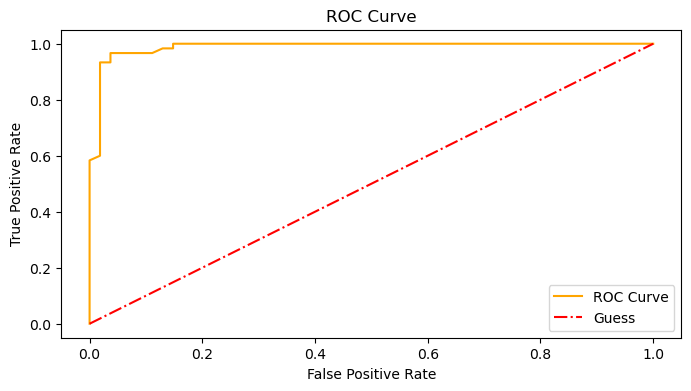

In [7]:
classifier_metrics(clf, X, y, X_train, X_test, y_train, y_test, 5)